In [1]:
import sys
sys.path.append("..")
from functions.functions import * 

# Preprocessing

In [2]:
X_train, X_test, X_val, y_train, y_test, y_val = preprocess(file_paths)

# Feature Selection

In [52]:
# Selected Features
selected_features = ['minimum_nights', 
                     'number_of_reviews', 
                     'reviews_per_month', 
                     'calculated_host_listings_count', 
                     'availability_365',
                     'Host Response Rate', 
                     'Accommodates', 
                     'Bathrooms', 
                     'Bedrooms', 
                     'Beds', 
                     'Square Feet',
                     'recency_last_review' ,
                     'last_review_day', 
                     'last_review_month', 
                     'last_review_year', 
                     'room_type_Entire home/apt', 
                     'room_type_Private room', 
                     'room_type_Shared room',
                     'mean_target_neighbourhood',
                     'mean_target_neighbourhood_group',
                     'neighbourhood_group_Bronx', 
                     'neighbourhood_group_Brooklyn',
                     'neighbourhood_group_Manhattan',
                     'neighbourhood_group_Queens',
                     'neighbourhood_group_Staten Island',
                     'x', 
                     'y', 
                     'z',
                     'text_encoding_tsne_1',
                     'text_encoding_tsne_2']


# Prepare feature matrices
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_val_selected = X_val[selected_features]

X_train_np = X_train_selected.to_numpy()
X_test_np = X_test_selected.to_numpy()
X_val_np = X_val_selected.to_numpy()

scaler = MinMaxScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)
X_val_np = scaler.transform(X_val_np)

y_train_np = y_train.to_numpy().flatten()
y_test_np = y_test.to_numpy().flatten()
y_val_np = y_val.to_numpy().flatten()

X_test_selected.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,...,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,x,y,z,text_encoding_tsne_1,text_encoding_tsne_2
27357,3,4,2.45,1,23,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208824,-0.728089,0.652900,-7.517027,-0.076676
17998,1,35,2.75,10,156,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208893,-0.728482,0.652440,-7.517027,-0.076676
11703,3,16,0.62,4,37,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,1,0,0,0,0.209660,-0.728891,0.651737,-7.517027,-0.076676
25026,1,0,0.00,10,284,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208956,-0.727793,0.653188,-7.517027,-0.076676
31283,1,0,0.00,1,43,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,1,0,0,0,0.209579,-0.728689,0.651989,-7.517027,-0.076676


# Decision tree

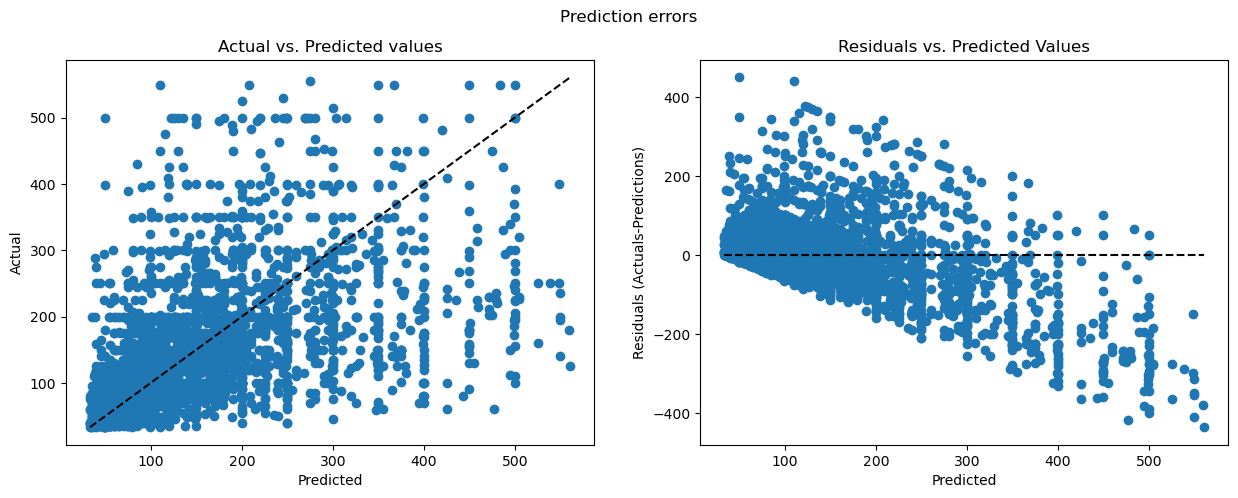

R²: 0.1082751332882923
MAE: 56.226858248134846
MSE: 7977.604586902459
RMSE: 89.31743719399063
MAPE: 0.42520780935579616
error_ratio_rmse: 0.645779585339596
error_ratio_mae: 0.40652932221471927


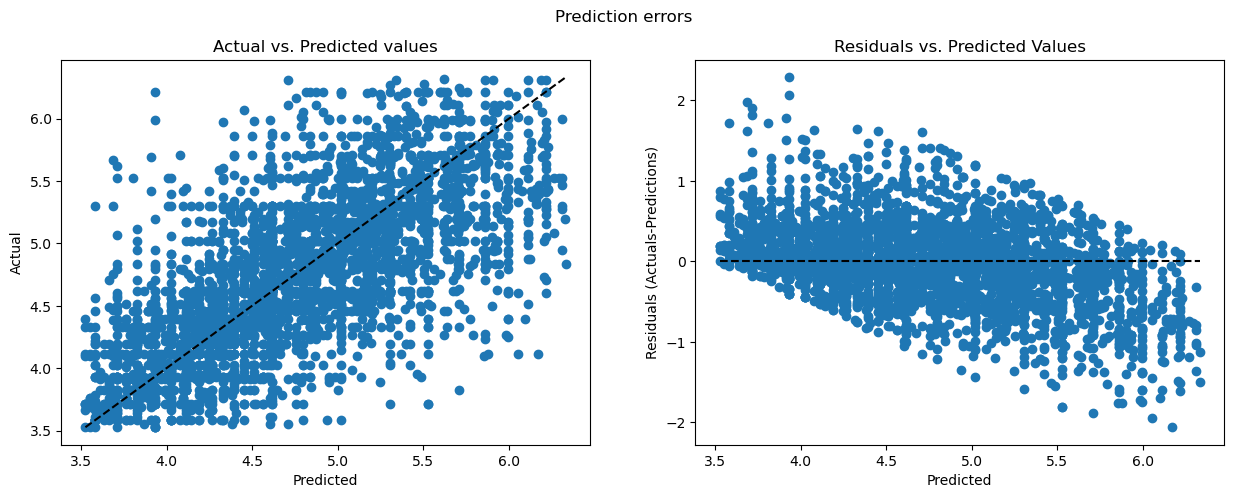

R²: 0.36773159722986926
MAE: 0.36821882024227093
MSE: 0.2457187080941558
RMSE: 0.4957002199859869
MAPE: 0.07773944012058678
error_ratio_rmse: 0.10461944223561513
error_ratio_mae: 0.07771400140893953


In [56]:
model_init = DecisionTreeRegressor().fit(X_train_np, y_train_np)
y_pred = np.maximum(0,model_init.predict(X_test_np))

# score for price
model_init_score=scores(y_test_np,y_pred,plot= True)

# score for log_price
model_init_logscore=scores(np.log(y_test_np+1),np.log(y_pred+1),plot= True)

#### Model Tuning

In [31]:
space={'max_depth': hp.quniform("max_depth", 3, 45, 1),
        'min_samples_split' : hp.quniform('min_samples_split', 2,100,1),
        'min_samples_leaf' : hp.quniform('min_samples_leaf', 2,100,1),
        'max_features' : hp.uniform('max_features', 0.0,1.0),
        'max_leaf_nodes' : hp.quniform('max_leaf_nodes', 2,30,1),
        'min_impurity_decrease' : hp.uniform('min_impurity_decrease', 0.0,0.2),
        'random_state': hp.quniform('random_state', 0, 1000, 1)
    }


def objective(space):
    mod=DecisionTreeRegressor(
                              max_depth =int(space['max_depth']), 
                              min_samples_split = int(space['min_samples_split']), 
                              max_features = space['max_features'],
                              min_impurity_decrease = space['min_impurity_decrease'],
                              min_samples_leaf=int(space['min_samples_leaf']),
                              max_leaf_nodes=int(space['max_leaf_nodes']),
                              random_state = int(space['random_state']),
                              criterion = 'squared_error'
                       )
    
    
    mod.fit(X_train_np, y_train_np)

    y_pred = mod.predict(X_test_np)
    score = scores(y_test_np, y_pred)['RMSE']
    print ("SCORE:", score)

    return {'loss': score, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

R²: 0.44090459639682633                                                                                                
MAE: 47.4969080091112                                                                                                  
MSE: 5001.814150084417                                                                                                 
RMSE: 70.72350493353972                                                                                                
MAPE: 0.39025183377101597                                                                                              
error_ratio_rmse: 0.5113424335110345                                                                                   
error_ratio_mae: 0.34341036333609054                                                                                   
SCORE:                                                                                                                 
70.72350493353972                       

MAE: 50.85562392450959                                                                                                 
MSE: 5532.237027713587                                                                                                 
RMSE: 74.37900932194235                                                                                                
MAPE: 0.43130717911280286                                                                                              
error_ratio_rmse: 0.537772324272707                                                                                    
error_ratio_mae: 0.3676944252086742                                                                                    
SCORE:                                                                                                                 
74.37900932194235                                                                                                      
R²: 0.4561641585023527                  

MSE: 5192.3067227666115                                                                                                
RMSE: 72.05766248475322                                                                                                
MAPE: 0.3925141656413452                                                                                               
error_ratio_rmse: 0.5209886094120412                                                                                   
error_ratio_mae: 0.3496436588013431                                                                                    
SCORE:                                                                                                                 
72.05766248475322                                                                                                      
R²: 0.4693272841216889                                                                                                 
MAE: 46.16846067595596                  

RMSE: 74.00696668190865                                                                                                
MAPE: 0.4118620035834958                                                                                               
error_ratio_rmse: 0.5350823955269036                                                                                   
error_ratio_mae: 0.36239807384254075                                                                                   
SCORE:                                                                                                                 
74.00696668190865                                                                                                      
R²: 0.4302627441150372                                                                                                 
MAE: 47.729987102611595                                                                                                
MSE: 5097.01895231159                   

MAPE: 0.38088104937015044                                                                                              
error_ratio_rmse: 0.5050069269521833                                                                                   
error_ratio_mae: 0.3391554833712139                                                                                    
SCORE:                                                                                                                 
69.84724433006348                                                                                                      
R²: 0.4695378555600066                                                                                                 
MAE: 46.09733951601568                                                                                                 
MSE: 4745.653502147699                                                                                                 
RMSE: 68.88870373397731                 

error_ratio_rmse: 0.5081727608802845                                                                                   
error_ratio_mae: 0.3412167975641307                                                                                    
SCORE:                                                                                                                 
70.28510916732229                                                                                                      
R²: 0.45112854375044187                                                                                                
MAE: 46.808943626399966                                                                                                
MSE: 4910.348034975146                                                                                                 
RMSE: 70.073875552699                                                                                                  
MAPE: 0.38074060893427947               

error_ratio_mae: 0.33699844487702324                                                                                   
SCORE:                                                                                                                 
69.35443044925415                                                                                                      
R²: 0.42006285165981627                                                                                                
MAE: 48.44553918497346                                                                                                 
MSE: 5188.269865989417                                                                                                 
RMSE: 72.02964574388393                                                                                                
MAPE: 0.39702565223526415                                                                                              
error_ratio_rmse: 0.5207860438227281    

In [33]:
best_hyperparams = {'max_depth': 29.0,
                     'max_features': 0.9959223533384182,
                     'max_leaf_nodes': 30.0,
                     'min_impurity_decrease': 0.1506578136299364,
                     'min_samples_leaf': 14.0,
                     'min_samples_split': 82.0,
                     'random_state': 631.0}

# = {'max_depth': 30.0,
#                      'max_features': 0.7408097218551376,
#                      'max_leaf_nodes': 30.0,
#                      'min_impurity_decrease': 0.14566408737779266,
#                      'min_samples_leaf': 2.0,
#                      'min_samples_split': 68.0,
#                      'random_state': 229.0}

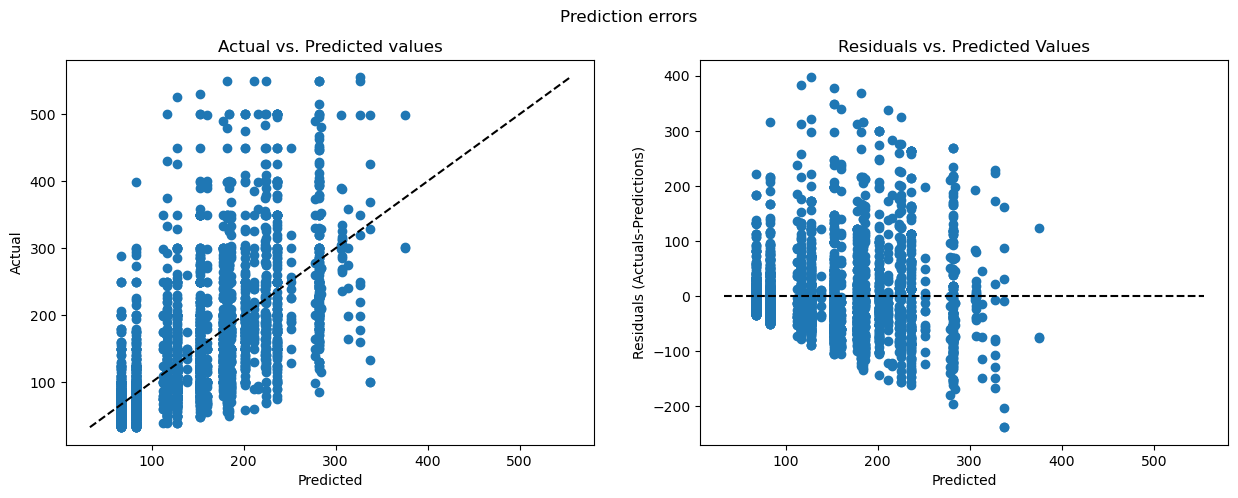

R²: 0.47807739666812765
MAE: 45.8255977175727
MSE: 4669.256527186797
RMSE: 68.33195831517487
MAPE: 0.3711947323149145
error_ratio_rmse: 0.4940511628247337
error_ratio_mae: 0.33132651833391724


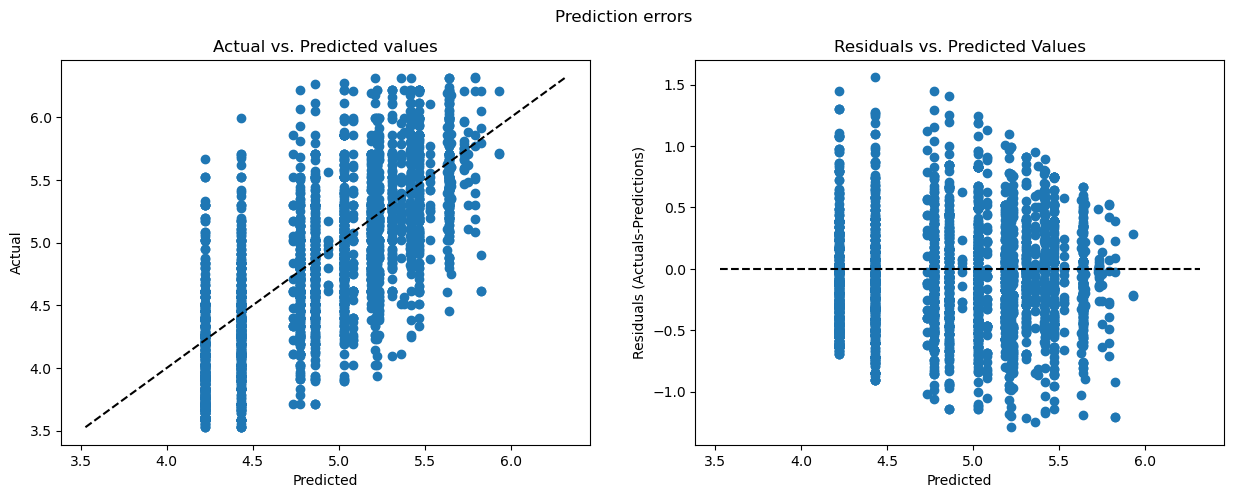

R²: 0.563765374803777
MAE: 0.3262907755608963
MSE: 0.16953402709912874
RMSE: 0.4117450996661997
MAPE: 0.07073247685933891
error_ratio_rmse: 0.08690039046491309
error_ratio_mae: 0.06886492595620043


In [57]:
model_tuned = DecisionTreeRegressor(
                              max_depth =int(best_hyperparams['max_depth']), 
                              min_samples_split = int(best_hyperparams['min_samples_split']), 
                              max_features = best_hyperparams['max_features'],
                              min_impurity_decrease = best_hyperparams['min_impurity_decrease'],
                              min_samples_leaf=int(best_hyperparams['min_samples_leaf']),
                              max_leaf_nodes=int(best_hyperparams['max_leaf_nodes']),
                              random_state = int(best_hyperparams['random_state']),
                              criterion = 'squared_error'
                       )

model_tuned.fit(X_train_np, y_train_np)

y_pred = np.maximum(0,model_tuned.predict(X_test_np))
model_tuned_score = scores(y_test_np,y_pred,plot=True)
model_tuned_logscore= scores(np.log(y_test_np+1),np.log(y_pred+1),plot= True)

# Save Model

In [58]:
dt_params = model_tuned.get_params()

# Save the parameters as a JSON file
with open('saved_models/decision_tree_params.json', 'w') as f:
    json.dump(dt_params, f)